In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/hri/east/ML'

In [56]:
train = pd.read_csv("data/train_titanic.csv")
test = pd.read_csv("data/test_titanic.csv")

In [57]:
train.shape

(891, 12)

In [58]:
test.shape

(418, 11)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [61]:
train['Embarked'].fillna('S', inplace=True)

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [63]:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


<Axes: >

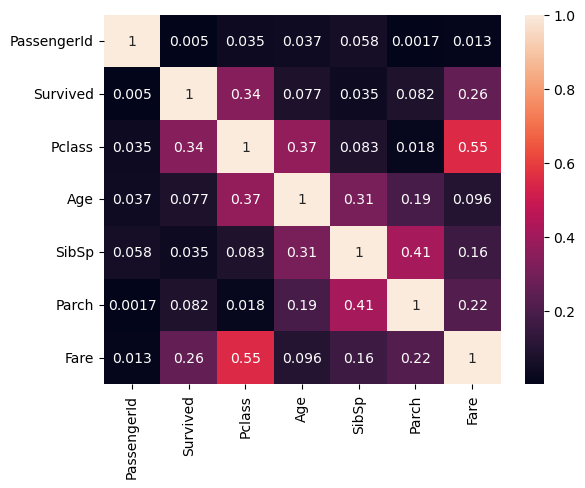

In [64]:
sns.heatmap(train.corr(numeric_only=True).abs(), annot = True)

In [65]:
temp =train[['Pclass', 'SibSp', 'Age']].groupby(['Pclass', 'SibSp']).mean().reset_index()
temp

,Pclass,SibSp,Age
0,1,0,39.181416
1,1,1,37.414154
2,1,2,37.200000
3,1,3,22.000000
4,2,0,31.934220
5,2,1,27.363636
6,2,2,19.125000
7,2,3,30.000000
8,3,0,27.630201
9,3,1,24.912698


In [50]:
a = temp['Age'][(temp['Pclass'] == 1) & (temp['SibSp'] == 0)]

In [69]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,27.630201,0,0,330877,8.4583,NaN,Q


In [52]:
a.astype(int)

0    39
Name: Age, dtype: int64

In [37]:
train.iloc[0, 2]

3

In [68]:
for i in range(len(train)):
    if pd.isna(train['Age'][i]):
        value_pclass = train.iloc[i, 2]
        value_sibsp = train.iloc[i, 6]
        value = temp['Age'][(temp['Pclass'] == value_pclass) & (temp['SibSp'] == value_sibsp)]
        train['Age'][i] = value

    else:
        value = train['Age'][i]
        train['Age'][i] = value

/var/folders/2p/hczn87ms78g3j9fv2ybj14s80000gn/T/ipykernel_93604/3156942942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = value
/var/folders/2p/hczn87ms78g3j9fv2ybj14s80000gn/T/ipykernel_93604/3156942942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = value
/var/folders/2p/hczn87ms78g3j9fv2ybj14s80000gn/T/ipykernel_93604/3156942942.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trai

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          884 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
if pd.isna(train['Age'][888]):
    print("true")

true


In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 11)

In [6]:
test.shape

(418, 10)

In [7]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.info()
#결측치가 있는 컬럼 : Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
#컬럼 정보 정리
train.columns
#Survived : 생존/사망 결과 값 담긴 컬럼
#Pclass : 객실 등급(1:상위층, 2:중상위층, 3:하위층)
#SibSp : 형제자매/배우자 수 (같이 탑승한)
#Parch : 부모/자식 수 (같이 탑승한)
#Ticket : 티켓의 번호
#Fare : 지불 요금
#Cabin : 객실 번호 **번호 그 자체로 넣게 되면 연관관계를 찾을 수 없음**
#Embarked : 승선항 (S,C,Q)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
#train 결측치가 있는 컬럼 : Age, Cabin, Embarked 채우기
#test 결측치가 있는 컬럼 : Age, Fare, Cabin

In [15]:
#1. 결측치가 있는 행 전체 삭제하는 방법
# > 삭제하려는 데이터가 너무 많거나 모델링에 치명적이지 않은 데이터
# > 데이터 많을수록 과대적합을 피할 수 있는데, 삭제하면 학습하는 데이터가 줄어듦.
#2. 결측치를 다른 값으로 대체하는 방법
# > 평균값, 최빈값, 중앙값, 다른 변수와 관계를 보고 입력, ...

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [25]:
#1.첫번째 결측치 있는 열 탐색
train['Embarked'].value_counts()
train['Embarked'].isnull().value_counts()
#train['Embarked'].isnull().sum()

Embarked
False    891
Name: count, dtype: int64

In [23]:
train['Embarked'][train['Embarked'].isnull() == True] = 'S'
#혹은 fillna('값')
#비어있는 데이터가 있다면 '값'으로 채워주는 함수
#train['Embarked'] = train['Embarked'].fillna('S')

/var/folders/2p/hczn87ms78g3j9fv2ybj14s80000gn/T/ipykernel_76240/324718114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked'][train['Embarked'].isnull() == True] = 'S'


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [36]:
#Fare컬럼과 연관성이 있는 컬럼이 있지 않을까??
test['Fare'].describe()
test.corr(numeric_only=True) #숫자로 된 컬럼 포함
# -1,1에 가까울수록 해당 컬럼과 상관이 높다, 0에 가까울수록 해당 컬럼과 선형관계가 없음

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


In [37]:
train['Fare'].describe()
train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [40]:
#train, test, fare 컬럼은 pclass와 연관성이 상대적으로 높다
train.corr(numeric_only=True)['Fare'].abs().sort_values(ascending=False)

Fare        1.000000
Pclass      0.549500
Survived    0.257307
Parch       0.216225
SibSp       0.159651
Age         0.096067
Name: Fare, dtype: float64

<Axes: >

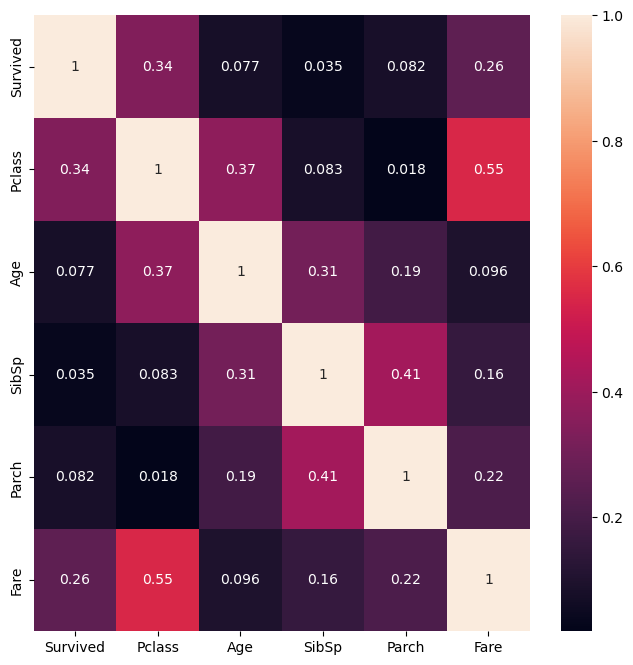

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(numeric_only=True).abs(), annot = True)

In [43]:
#train Pclass
train['Pclass'].unique()

array([3, 1, 2])

In [45]:
#객실 등급을 기준으로 그룹화, 요금 집계함수는 중앙값
train[['Pclass', 'Fare']].groupby(['Pclass']).median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


In [46]:
train[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [51]:
# Pclass, sex를 기준으로 그룹핑해서 fare의 중앙값을 확인
train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [57]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [59]:
#Pclass는 3등석, 남자 - 7.92500
test['Fare'].fillna(7.925, inplace = True)

In [58]:
test['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [61]:
# train, test Age 채우기
## 위에서 사용했던 Pclass, sex 컬럼을 그룹핑하여 Age의 집계를 확인하고 채우기
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [62]:
train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [64]:
#Age는 Pclass와 상관관계가 상대적으로 높았음
#Pclass, sex를 구릅화하여 age 평균 출력
gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [67]:
#2등급 객실, 남성일 경우의 평균 데이터 가져오기
gb1.loc[(2,'male'),:].iloc[0] #값하나만 뽑아주기

30.74070707070707

In [66]:
#train Age 결측치 행
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [68]:
#규칙에 맞게 Pclass와 Sex를 보면서 Age 채워넣는 함수 정의
def fill_age(row):
    # row : 받아오는 행에 데이터에 대한 매개변수
    # row의 age가 결측치라면 gb1에서 매칭되는 값을 찾아서 인덱싱 해오도록
    # 결측치가 아니라면 원래 작성된 나이값을 사용
    
    #만약에 나이가 결측치라면, gb1의 값을 인덱싱
    if np.isnan(row['Age']) : #받아온 행의 Age가 결측치라면
        return gb1.loc[(row['Pclass'],row['Sex']),:].iloc[0]

    else:
        return row['Age']

In [72]:
train['Age'] = train.apply(fill_age, axis=1).astype(np.int64)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [74]:
test['Age'] = test.apply(fill_age, axis=1).astype(np.int64)

In [ ]:
##정리
# apply, fill_age
# 데이터를 행단위로 매개변수에 전달
# 결과값으로 Age를 채울 수 있는 대표값을 하나 return
# 정수형으로 변환을 해서 'Age'컬럼에 넣어줌

In [83]:
#Cabin 채우기
#임의의 값으로 결측치를 채워볼 예정
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 115.8+ KB


In [85]:
train['Cabin'].unique()

array(['M', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [87]:
train['Cabin'].str[0].unique()
#데이터 내부 분자열에 접근하는 함수

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [88]:
train['Deck'] = train['Cabin'].str[0]

In [89]:
test['Deck'] = test['Cabin'].str[0]

In [90]:
train[['Deck', 'Cabin']]

,Deck,Cabin
PassengerId,,
1,M,M
2,C,C85
3,M,M
4,C,C123
5,M,M
...,...,...
887,M,M
888,B,B42
889,M,M


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 115.8+ KB


In [92]:
train.drop('Cabin', axis=1, inplace = True)

<Axes: xlabel='Deck', ylabel='count'>

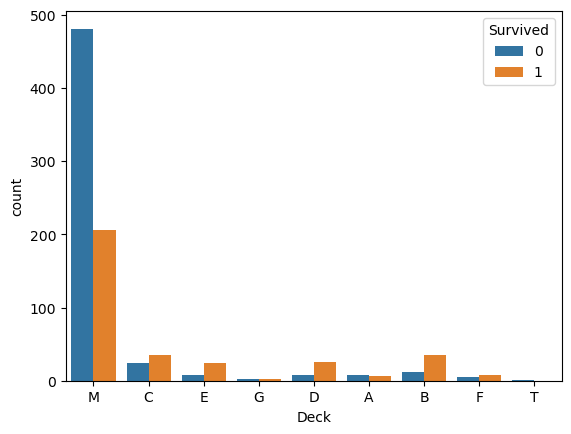

In [94]:
###시각화
sns.countplot(data=train, x='Deck', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

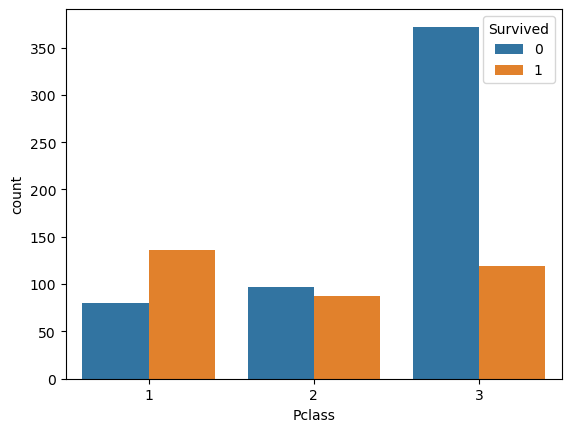

In [95]:
# Pclass에 따른 생존/사망 시각화(층이 객실 등급이랑 연관이 있진 않을까)
sns.countplot(data=train, x='Pclass', hue='Survived')
#3등석에 탐승한 사람들이 비교적 사망자수가 많음

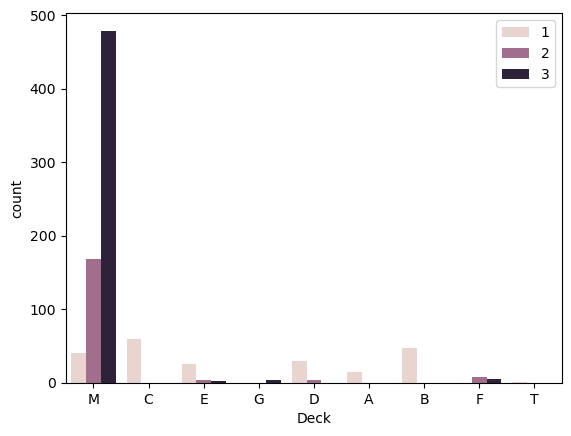

In [96]:
#Deck과 Pclass를 시각화 연결
sns.countplot(data=train, x='Deck', hue='Pclass')
plt.legend()
plt.show()
#M층 사람들은 웬만하면 3등석 사람들이구나

In [ ]:
# 임의의 층 M층에는 3등석인 사람들이 많음
# 그래서 Pclass가 3등급이어서 사망자가 많았음을 확인할 수가 있다
# 그래서 M이라는 데이터는 더이상 신경쓰지 않는다. Pclass데이터를 통해 알 수 있기 때문에.